### GOAL : GROUPING WORDS USING CLUSTERING ALGORITHM AND TRY TO COME UP WITH CONCEPTS RELATED TO A CLUSTER TO DEFINE OUR ENTITY TYPE SYSTEM. 


In [3]:
# loading the word2vec model 
from gensim.models import Word2Vec
if(0):
    
    model = Word2Vec.load('./Word2Vec_models/Word2Vec_version1')


In [7]:
model.wv.similarity('butter','bread')

0.5323860389179608

## Clustering Words to find the interesting Segements of Data

### ELBOW METHOD EVALUATION TO DECIDE THE NUMBER OF CLUSTER 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


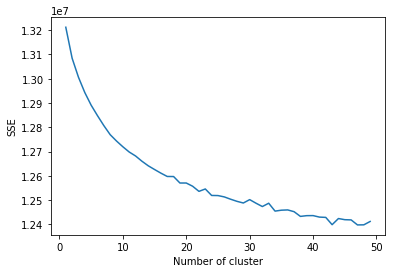

In [9]:
# first tried to find the cluster within the 50 clusters range
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
sse = {}
X = model[model.wv.vocab]
for k in range(1, 50):i 
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300 , n_jobs = -1).fit(X)
    labels = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

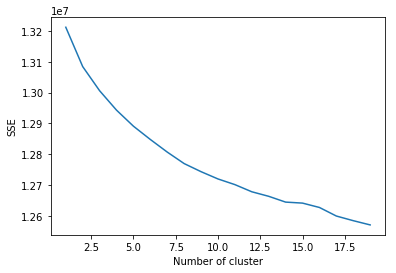

In [12]:
# then narrow down the search within 20 clusters
# gap statistics is computationally expensive, the result was 7 cluster
sse_10 = {}
for k in range(1, 20):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300 , n_jobs = -1).fit(X)
    labels = kmeans.labels_
    sse_10[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse_10.keys()), list(sse_10.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Gap Statistics is quite computationally expensive, the result was 7 clusters. You can find the code implementation when we look into minning of the cluster

### LET'S SEE WHAT THESE CLUTERS ARE SPEAKING ABOUT

## ---------------------------------------------------------------------------------------------------------------------------

### Going the Cosine Similarity way  

One informal but rather intuitive way to think about this is to consider the 2 components of a vector: direction and magnitude.

Direction is the "preference" / "style" / "sentiment" / "latent variable" of the vector, while the magnitude is how strong it is towards that direction.



In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics

In [11]:
# loading the clusters pickle
# since there is no seed for the cluster initialization in implementation of K-means 
import pickle
pickle_in = open("./Pickles/Kmeans_cluster.pickle","rb")
kmeans_load = pickle.load(pickle_in)

In [12]:
labels = kmeans_load.labels_
centroids = kmeans_load.cluster_centers_

In [13]:
# word_vocab list of all the words 
word_vocab = [word for word , objects in model.wv.vocab.items()]

In [14]:
import marshal
# each word with the label
labels_words_dict = dict(zip(word_vocab,labels))
label_0_list = []
label_1_list = []
label_2_list = []
label_3_list = []
label_4_list = []
label_5_list = []
label_6_list = []

# segregating the words of different clusters into different clusters
for word,label in labels_words_dict.items():
    if (label == 0):
        label_0_list.append(word)
    if (label == 1):
        label_1_list.append(word)
    if (label == 2):
        label_2_list.append(word)
    if (label == 3):
        label_3_list.append(word)
    if (label == 4):
        label_4_list.append(word)
    if (label == 5):
        label_5_list.append(word)
    if (label == 6):
        label_6_list.append(word)

# storing words of each of the cluster in marshal object 
def marshal_clusters(list_cluster,cluster_number):
    marshal_in = open('cluster_'+str(cluster_number)+'_words.marshal','wb')
    marshal.dump(list_cluster,marshal_in)
    marshal_in.close()
    
marshal_clusters(label_0_list,0)
marshal_clusters(label_1_list,1)
marshal_clusters(label_2_list,2)
marshal_clusters(label_3_list,3)
marshal_clusters(label_4_list,4)
marshal_clusters(label_5_list,5)
marshal_clusters(label_6_list,6)






In [15]:
print('Number of Words in Cluster 0 :',len(label_0_list))
print('Number of words in Cluster 1 :',len(label_1_list))
print('Number of words in Cluster 2 :',len(label_2_list))
print('NUmber of words in Cluster 3 :',len(label_3_list))
print('NUmber of words in Cluster 4 :',len(label_4_list))
print('NUmber of words in Cluster 5 :',len(label_5_list))
print('NUmber of words in Cluster 6 :',len(label_6_list))


Number of Words in Cluster 0 : 12753
Number of words in Cluster 1 : 101230
Number of words in Cluster 2 : 83952
NUmber of words in Cluster 3 : 77058
NUmber of words in Cluster 4 : 70426
NUmber of words in Cluster 5 : 70814
NUmber of words in Cluster 6 : 43592


In [16]:
# find the average vector value for each of the cluster which is the representation of the word of the that cluster 
# Add details here .....
import numpy as np 
word_vector_0 = np.zeros((300,))
word_vector_1 = np.zeros((300,))
word_vector_2 = np.zeros((300,))
word_vector_3 = np.zeros((300,))
word_vector_4 = np.zeros((300,))
word_vector_5 = np.zeros((300,))
word_vector_6 = np.zeros((300,))

for i in label_0_list:
    word_vector_0 = np.add(word_vector_0 ,np.asarray(model.wv[i]))
average_word_vector_0 = word_vector_0/len(label_0_list)
for i in label_1_list:
    word_vector_1 = np.add(word_vector_1,np.asarray(model.wv[i]))
average_word_vector_1 = word_vector_1/len(label_1_list)
for i in label_2_list:
    word_vector_2 = np.add(word_vector_2,np.asarray(model.wv[i]))
average_word_vector_2 = word_vector_2/len(label_2_list)
for i in label_3_list:
    word_vector_3 = np.add(word_vector_3,np.asarray(model.wv[i]))
average_word_vector_3 = word_vector_3/len(label_3_list)
for i in label_4_list:
    word_vector_4 = np.add(word_vector_4,np.asarray(model.wv[i]))
average_word_vector_4 = word_vector_4/len(label_4_list)

for i in label_5_list:
    word_vector_5 = np.add(word_vector_5,np.asarray(model.wv[i]))
average_word_vector_5 = word_vector_5/len(label_5_list)
for i in label_6_list:
    word_vector_6 = np.add(word_vector_6,np.asarray(model.wv[i]))
average_word_vector_6 = word_vector_6/len(label_6_list)




In [17]:
def cosine_function(x,y):
    c = np.dot(x,y)
    norm_a = np.linalg.norm(x)
    norm_b = np.linalg.norm(y)
    cosine_val = c/((norm_a)*(norm_b))
    return(cosine_val)

In [18]:
import matplotlib.pyplot as plt

cosine_similarity_0 = [cosine_function(average_word_vector_0,model.wv[i]) for i in label_0_list ]
cosine_similarity_1 = [cosine_function(average_word_vector_1,model.wv[i]) for i in label_1_list ]
cosine_similarity_2 = [cosine_function(average_word_vector_2,model.wv[i]) for i in label_2_list ]
cosine_similarity_3 = [cosine_function(average_word_vector_3,model.wv[i]) for i in label_3_list ]
cosine_similarity_4 = [cosine_function(average_word_vector_4,model.wv[i]) for i in label_4_list ]
cosine_similarity_5 = [cosine_function(average_word_vector_5,model.wv[i]) for i in label_5_list ]
cosine_similarity_6 = [cosine_function(average_word_vector_6,model.wv[i]) for i in label_6_list ]





In [19]:
def cluster_summary(cosine_similarity,cluster_number):
    print('Summary Statistics of Cosine Similairty Distribution CLUSTER '+ str(cluster_number) +' --------->')
    print()
    print('Average Cosine similarity :', np.mean(cosine_similarity))
    print('Max Cosine Similarity :', max(cosine_similarity))
    print('Min Cosine Similarity :',min(cosine_similarity))
    print('Standard Deviation of the Cosine similarity Distribution :',np.std(cosine_similarity))

    x = np.arange(0,max(cosine_similarity), 0.02)
    y = cosine_similarity
    plt.hist(y,bins =x,histtype = 'barstacked',color = 'green')
    plt.xlabel('[Cosine Values]',color = 'blue')
    plt.ylabel('[Number of Words]',color = 'blue')
    plt.title('[Cosine Distribution for Cluster '+str(cluster_number)+']',color = 'blue')
    plt.show()

Analyzing the cosine value distribution of each of the cluster, to see understand the cluster's demography , how close vectors are in that cluster and how far off the words are.What is the tendency of having well defined concept for that cluster.

Summary Statistics of Cosine Similairty Distribution CLUSTER 0 --------->

Average Cosine similarity : 0.42651584186376085
Max Cosine Similarity : 0.7981833408767288
Min Cosine Similarity : 0.21784408363446367
Standard Deviation of the Cosine similarity Distribution : 0.11404032046675208


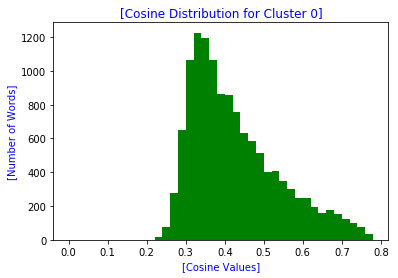

In [20]:
cluster_summary(cosine_similarity_0,0)


### We see that there is right skewness in the cosine similarity distribution means there are some words which are very close to average word vector of the cluster but there are some words which are not that close. This means we will not be able to generalise a concept for the cluster clearly i.e. the variance is  high, the cosine similarity values are pretty spread.

Summary Statistics of Cosine Similairty Distribution CLUSTER 1 --------->

Average Cosine similarity : 0.273148431188275
Max Cosine Similarity : 0.5593889975417108
Min Cosine Similarity : 0.10753297468072912
Standard Deviation of the Cosine similarity Distribution : 0.04552190696071823


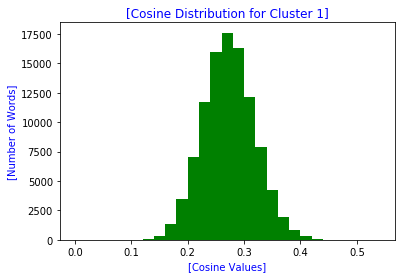

In [21]:
cluster_summary(cosine_similarity_1,1)

### Quite a symmetric distribution we see here, means that though the words are not close projection of average projection but are relatively quite same projections and thus it means we can try to generalise a concept for the cluster.  

Summary Statistics of Cosine Similairty Distribution CLUSTER 2 --------->

Average Cosine similarity : 0.2945982902554741
Max Cosine Similarity : 0.5373558296330871
Min Cosine Similarity : 0.14520548376612433
Standard Deviation of the Cosine similarity Distribution : 0.04845612449404898


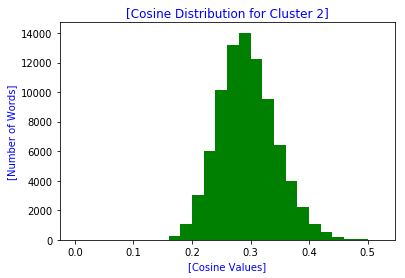

In [22]:
cluster_summary(cosine_similarity_2,2)

## Quite symmetric  , no significant skewness to be seen 

Summary Statistics of Cosine Similairty Distribution CLUSTER 3 --------->

Average Cosine similarity : 0.284557839320041
Max Cosine Similarity : 0.486588748832766
Min Cosine Similarity : 0.14232886488805846
Standard Deviation of the Cosine similarity Distribution : 0.04468484717387273


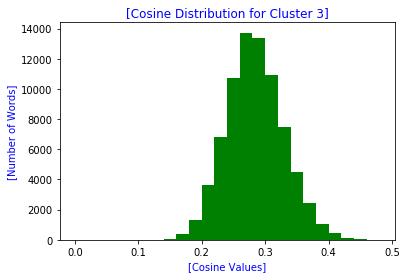

In [23]:
cluster_summary(cosine_similarity_3,3)

Summary Statistics of Cosine Similairty Distribution CLUSTER 4 --------->

Average Cosine similarity : 0.34674128390436976
Max Cosine Similarity : 0.6415876100211904
Min Cosine Similarity : 0.16790415198706857
Standard Deviation of the Cosine similarity Distribution : 0.06520638001807876


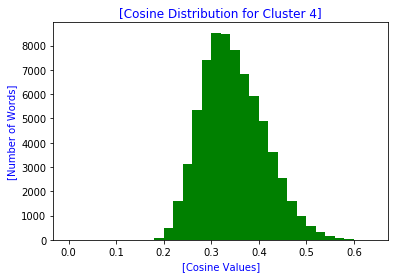

In [24]:
cluster_summary(cosine_similarity_4,4)

In [25]:
cluster_summary(cosine_similarity_5,5)

Summary Statistics of Cosine Similairty Distribution CLUSTER 5 --------->

Average Cosine similarity : 0.30832250705025427
Max Cosine Similarity : 0.611776610169551
Min Cosine Similarity : 0.14340969932934516
Standard Deviation of the Cosine similarity Distribution : 0.055409048896287144


Summary Statistics of Cosine Similairty Distribution CLUSTER 6 --------->

Average Cosine similarity : 0.3394634168988597
Max Cosine Similarity : 0.5973402324182181
Min Cosine Similarity : 0.17229104689221336
Standard Deviation of the Cosine similarity Distribution : 0.06336870410571352


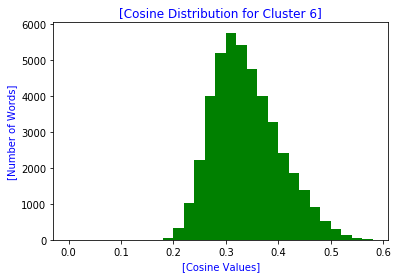

In [26]:
cluster_summary(cosine_similarity_6,6)

In [27]:
# Look at the distribution of cosine similarity values for each of the cluster's average vector's dot with each of the vector in
# in the cluster

threshold_cosine_0 = np.percentile(cosine_similarity_0,99)
threshold_cosine_1 = np.percentile(cosine_similarity_1,99)
threshold_cosine_2 = np.percentile(cosine_similarity_2,99)
threshold_cosine_3 = np.percentile(cosine_similarity_3,99)
threshold_cosine_4 = np.percentile(cosine_similarity_4,99)
threshold_cosine_5 = np.percentile(cosine_similarity_5,99)
threshold_cosine_6 = np.percentile(cosine_similarity_6,99)

print("Cosine Similarity Threshold Cluster 0 :",threshold_cosine_0)
print("Cosine Similarity Threshold Cluster 1 :",threshold_cosine_1)
print("Cosine Similarity Threshold Cluster 2 :",threshold_cosine_2)
print("Cosine Similarity Threshold Cluster 3 :",threshold_cosine_3)
print("Cosine Similarity Threshold Cluster 4 :",threshold_cosine_4)
print("Cosine Similarity Threshold Cluster 5 :",threshold_cosine_5)
print("Cosine Similarity Threshold Cluster 6 :",threshold_cosine_6)




Cosine Similarity Threshold Cluster 0 : 0.7383687352758794
Cosine Similarity Threshold Cluster 1 : 0.4237374236392244
Cosine Similarity Threshold Cluster 2 : 0.4619509842396238
Cosine Similarity Threshold Cluster 3 : 0.4328421896816954
Cosine Similarity Threshold Cluster 4 : 0.5642447221268031
Cosine Similarity Threshold Cluster 5 : 0.5173856773882224
Cosine Similarity Threshold Cluster 6 : 0.5538464254997166


### The 99.9th percentile or 99.9th percentile value for the cosine Value distribution means that only 0.1 % of words have higher cosine similairity than the threshold value, which means those words are more near to the average vector value of each of the Cluster and that means they somewhat represent the Cluster itself

In [28]:

def candidate_concepts(label_list,cosine_similarity,threshold_cosine):
    concept_list= []
    for x in range(len(cosine_similarity)):
        if(cosine_similarity[x]>threshold_cosine):
            concept_list.append(label_list[x])
    return (concept_list)

In [29]:
# Concept Words Candidate for Cluster 0 
concept_list_0 = candidate_concepts(label_0_list,cosine_similarity_0,threshold_cosine_0)
# Concept Words Candidate for Cluster 1
concept_list_1 = candidate_concepts(label_1_list,cosine_similarity_1,threshold_cosine_1)
# Concept Words Candidate for Cluster 2
concept_list_2 = candidate_concepts(label_2_list,cosine_similarity_2,threshold_cosine_2)
# Concept Words Candidate for Cluster 3
concept_list_3 = candidate_concepts(label_3_list,cosine_similarity_3,threshold_cosine_3)
# Concept Words Candidate for Cluster 4
concept_list_4 = candidate_concepts(label_4_list,cosine_similarity_4,threshold_cosine_4)
# Concept Words Candidate for Cluster 5
concept_list_5 = candidate_concepts(label_5_list,cosine_similarity_5,threshold_cosine_5)
# Concept Words Candidate for Cluster 6
concept_list_6 = candidate_concepts(label_6_list,cosine_similarity_6,threshold_cosine_6)




In [30]:

print((concept_list_0))
#marshal_store = open('cluster_0_words.marshal','wb')
#marshal.dump(concept_list_0,marshal_store)
#marshal_store.close()

['TO', 'OF', 'FROM', 'WITH', 'PUT', 'THEY', 'HINDRANCE', 'STAYED', 'ENSURE', 'OVERGROWN', 'WASTING', 'ALLOWING', 'READILY', 'VICTIM', 'DAMAGES', 'ACCOUNTABILITY', 'OLDEST', 'ABSOULTLLY', 'MEMPHIS', 'VEGASNV', 'LOSS', 'MAKEOVER', 'REFURBISH', 'WHIPPINBG', 'BECOMES', 'TIRRIBLE', 'PEOPLEMANY', 'ANDAS', 'ROBB', 'HEALTHWISE', 'SORT', 'STEPPING', 'RELEASE', 'MESSAGE', 'PENNIES', 'HEADING', 'BELIVE', 'WASHER', 'REMINDS', 'ANGER', 'MUTTER', 'INCOHERENTLY', 'BELLMEN', 'REALIZE', 'ROOMSSO', 'HOSPITALITYNO', 'TURISM', 'DACO', 'BUZZED', 'confunsing', 'SHARES', 'IWOULD', 'ARTISTIC', 'LOCKING', 'RESTORING', 'SENATUS', 'DISCRETION', 'REPHRASE', 'RERENT', 'sTAY', 'SUITESWE', 'HOTELHOTLINECOM', 'WELLâ€Ž', 'MALO', 'LAURENT', 'EQUIVALENT', 'PROCESSING', 'STAYWE', 'GERMANYTHEY', 'APPLIES', 'INVESTIGATE', 'INVESTIGATED', 'HOBORN', 'AMBASSADORS', 'INCASE', 'PROPORTION', 'CARDBOARD', 'DEMONSTRATORS', 'PARLIMENT', 'DESERVES', 'MARRED', 'MONEYI', 'BREAKS', 'UNWORTHY', 'CONSIDERED', 'ADMITS', 'RENNOVATED', 'COR

In [81]:
# adjectives 
print((concept_list_1))
#marshal_store = open('cluster_1_words.marshal','wb')
#marshal.dump(concept_list_1,marshal_store)
#marshal_store.close()

['internet', 'price', 'included', 'pay', 'standard', 'expect', 'toiletariesIt', 'grownd', 'Durry', '75page', 'dearas', 'accessprinting', 'eiither', 'Firendly', 'internetcocktails', 'roomfurniture', 'Parknfly', 'Bencoolin', 'Bencoleen', 'Ipadhowever', 'pricelook', 'heavyAt', 'Farimonts', 'Farirmont', 'unenviable', 'EuroStars', 'alreadyso', 'requireThe', '300CDN', '1800HKDno', 'again4', 'Dufort', 'fullhotel', '26d', 'RamblinGal', 'cleancomfortablenice', 'cleaniess', 'qaulities', 'Â£225', 'especific', 'facilitiesamenities', '200EU', 'portoghesi', 'csutomers', 'avoind', 'Kaffeeall', '£c', 'roomRECOMMENDATIONWe', 'freeOutside', 'visitorsJenny', 'Yarmouth', 'Londom', 'Â£80Â£100', 'etc4', '178night', 'averagerooms', 'teacoffeeetc', 'Â£4950', 'room363', 'expectgood', 'wwwtravellodgecouk', 'redecoratingwith', 'londontown', 'hotelyouth', 'BHRC', 'CoffeeThe', 'reaquaint', '119E', 'wowwowwowwowwhat', 'wifisafe', 'buffettIf', '100KB', '鈧27', 'RoomFriendly', 'bakeriescafes', 'AmsterdamWe', 'barinter

In [36]:
#Interior of Rooms
print((concept_list_2))

['wall', 'dirty', 'mouldy', 'workheating', 'usv', 'hotlines', 'dissapered', 'abusedwire', 'costsIt', 'AWFULAWFULChecked', 'OVERPOWERING', 'plentifulyuck', '245AM', 'hairfur', 'venition', 'mildewOur', 'wrappaed', 'wetIooked', 'Shwioer', 'Murphybed', '12m2', 'nonfitting', 'tossled', 'DRILLED', 'sheetsWe', 'coubhurts', 'sleepbesides', 'Surpassingly', 'visibily', 'shair', 'cigarettessay', 'mmy', 'monthThere', 'waslocated', 'claustrophobicMy', 'chambermaiden', 'morningfortunately', 'myselfWhen', 'squewiff', 'RVstyle', 'markedradiator', 'fithystained', 'crackedstains', 'distincly', 'Whilts', 'pierciing', 'ceiliong', 'sheered', 'kettlethe', '350am', 'kneesno', 'ensuiteif', 'diahrroea', 'damphumidity', 'chjange', 'judders', 'lamplightbulb', 'tapethe', 'incompletely', 'indeedNext', 'occcured', 'dustmites', 'bedsrpeads', 'Fuggedabotit', 'pipeThe', 'inciting', 'meldewy', 'cricketts', 'mapwhen', 'powderyfloral', 'drippping', 'blodd', 'curtiains', 'dirtythis', 'coimplaining', '6Holes', 'dampdankymu

In [37]:
# Water , adventure , activities 
print((concept_list_3))

['kayaking', 'dayduh', 'swansparrots', 'dockI', 'swams', 'TurtleTown', 'Honus', 'violetblue', 'hotelperferct', 'KaanapalliLahaina', 'eelsetc', 'snorklingscuba', 'seekersthe', 'braveheart', 'furtherParidise', 'taxia', 'dayâ€¦very', 'crochet', 'vegetaition', 'sandjust', 'instuments', 'HanaKai', '410yrs', 'putttable', 'trike', 'tennishorse', 'IGUANA', 'tennisand', 'browngolden', 'carriben', 'atnot', 'educationbut', 'completelykid', 'catamans', 'Saono', 'ricetoo', 'lovelyAmazing', 'popalayssp', 'salsamerengueboccia', 'waterTopless', 'temperaturesunique', 'fishgreat', 'aquarmarine', 'rocks…what', 'soccerbeach', 'manarays', 'Dollsthere', 'volleyballpolotequila', 'dartsbeer', 'poolwithaview', 'SUNGLASSES', 'ballhorseshoe', 'trampolining', 'buggieboard', 'Winthin', 'Benessimo', 'Equpiment', 'biketaxiwalk', 'MarinaIt', 'ResortsHotels', 'encountersnorkel', 'decentabout', 'DuvelWhitehead', 'murene', 'Involve', 'tzereques', 'Roped', 'craftsso', 'sumtimes', 'Jun6th2009', 'kayakingfabulous', 'noiseA

In [38]:
# Location 
print(concept_list_4)

['etcTons', 'StationSearsWillis', 'Dumaine', 'SFMoMA', 'storesStarbucks', '1025min', 'Ave14st', 'Iskatel', 'BuildingPenn', 'PittGeorge', 'restaurantsÂ', 'Baskins', 'Passeo', 'Cister', 'veryeasytospot', 'McQuarrie', 'InsurgentesReforma', 'pubrestaurantcoffee', 'areaMercer', 'Lepando', 'Beux', 'ATMpost', 'Voghes', 'minute2', 'Descalzas', 'museus', 'Konzerthausand', 'Reistag', 'Emabassies', 'Koncerthaus', 'twentyfiveminute', 'Belfast7', 'Harrods5', 'Harrods8', 'alsoEarls', 'museumall', 'Monceaufrom', 'Damethe', 'Tuilrie', 'Deaus', 'lOpÃ©ra', 'streetsteps', 'Bvl', 'antiquesauctioneer', 'Boissieres', 'LEntreacte', 'Lavier', 'Sicile', 'CercaniasMetro', 'Milina', 'Willhellms', 'Gaedechtniss', 'gatelots', 'Savygnyplatz', 'accesstoall', 'Postdamerplatz', 'Origional', 'surrunded', 'Alberinenstr', 'stopbuy', 'Staition', 'Sifia', 'Dosay', 'Ghiridelli', 'pricewinter', 'Rodins', 'DameChatelet', 'DEiffel', 'aroundplus', 'bouvelard', 'riverone']


In [39]:
# Persons Names 
print((concept_list_5))

['Especially…Jonas', 'Waltham', 'Angelice', 'Sowell', 'Pfeiffer', 'Anubha', 'Choudrie', 'Kumm', 'DeZura', 'BobbieTed', 'Brittay', 'Nuray', 'Hatun', 'AnneSophie', 'Aurielle', 'specialSpecial', 'HassanThank', 'Caity', 'Nattie', 'mets', 'scouser', 'Vicas', 'Duygu', 'Candar', 'Zeynap', 'servicesalways', 'Esaura', 'Forencio', 'Sotres', 'Anacona', 'Reprecce', 'Margahrita', 'fantasticErickand', 'Cristofher', 'Somalier', 'pescatores', 'Risdtorante', 'TitoNepoNorberto', 'Alionzo', 'Mariom', 'cooridinator', 'Captians', 'BenitoAurelio', 'JoseEktor', 'Alvain', 'coorporate', 'Olaf', 'Canella', 'Timiteo', 'Zanzot', 'Eveline', 'Luxman', 'Bozkurt', 'Christinexx', 'DAmico', 'Lombari', 'McLaughlin', 'MundtBlum', 'helpful…he', 'Wokosin', 'Swen', 'Gabrelle', 'Gabrial', 'Garman', 'Stevan', 'Ahiya', 'dispassion', 'Geyder', 'Amtonio', 'Cocinero', 'loungeOlives']


In [40]:
# Food 
print((concept_list_6))

['panko', 'yogurtgrated', 'toffe', '113pm', 'omelettesto', 'specificationsand', 'bokadilya', 'maccheese', 'applesbananasorangesfruit', 'fishball', 'romain', 'hollandaisevery', 'gravyvery', 'sandwichespasta', 'tahini', 'empadas', 'ommellets', 'lichees', 'masago', 'advocado', 'cheesessmoked', 'baconfresh', 'eveningthen', 'gnoochi', 'tostidas', 'bowlsetc', 'meatspates', 'mueslicornflakes', 'nuttela', 'yogurths', 'baguettesmacaroons', 'compotes', 'lambbeef', 'etc鈥There', 'pastriespuddings', 'butterbread', 'salmonthe', 'toasat', 'brownwhitetoastedsimitcroissant', 'granolacereal', 'jamjellies', 'gataux', 'icecreamgorgeous', 'dinnerlike']


### Another important observation here is that we are able to understand clusters what they are trying to tell us which gives us a broader view of the reviews that alot of review have elements as Food , Location , Room, People  and accessories in the text as a mention and that is why when we generated dense vector regions which are created in an unsupervised manner they turn out to tell us about above mentioned concepts. 




### Whoa KMeans - Means alot , now i have understood the power of unsupervised Algorithms and these vector representation makes sense!! 

## ------------------------------------------------------------------------------------------------------------------------------ 

## TSNE VISUALIZATION FOR THE WORDS IN 2 DIMENSIONS

https://www.quora.com/What-advantages-does-the-t-SNE-algorithm-have-over-PCA --- quora which explains why TSNE is better 
for non linear high dimensional data.

https://www.youtube.com/watch?v=RJVL80Gg3lA - youtube video which explains TSNE visualization better.

In [64]:
#from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model,cluster,words_to_plot):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    counter = 0
    for word in cluster:
        # token is vector rep of each word
        # label is the word itself
        tokens.append(model[word])
        labels.append(word)
        counter = counter + 1
        if counter == words_to_plot:
            break
    
    tsne_model = TSNE(perplexity=40, n_components=2,init = 'random', n_iter=2500, random_state=23 , n_jobs= 8)
    tokens = np.asarray(tokens)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 7)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.title('TSNE PLOT', color = 'blue' )
    plt.show()

## VISUALIZING THE VECTOR REPRESENTATION FROM 300D SPACE TO 2D FOR EACH OF THE CLUSTER 

## ----------------------------------------------------------------------------------------------------------------------------> 

### CLUSTER 0 

In [72]:
tsne_plot(model,concept_list_0,100)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


### CLUSTER 1

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


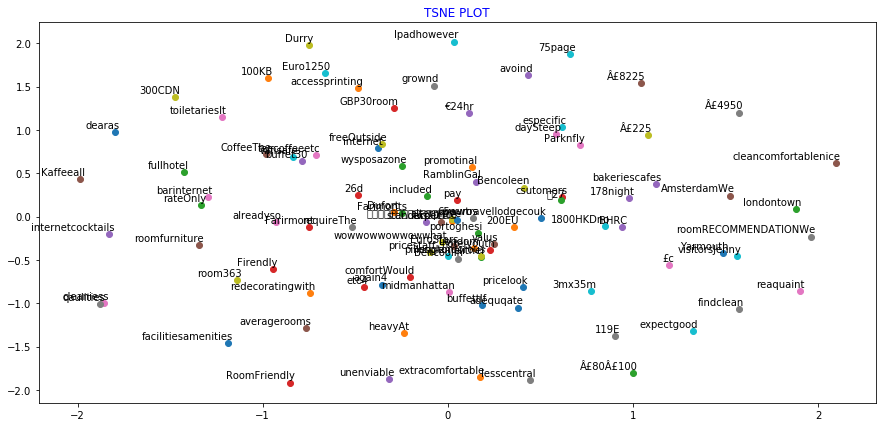

In [73]:
tsne_plot(model,concept_list_1,100)

### CLUSTER 2 

In [74]:
tsne_plot(model,concept_list_2,100)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


### CLUSTER 3 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


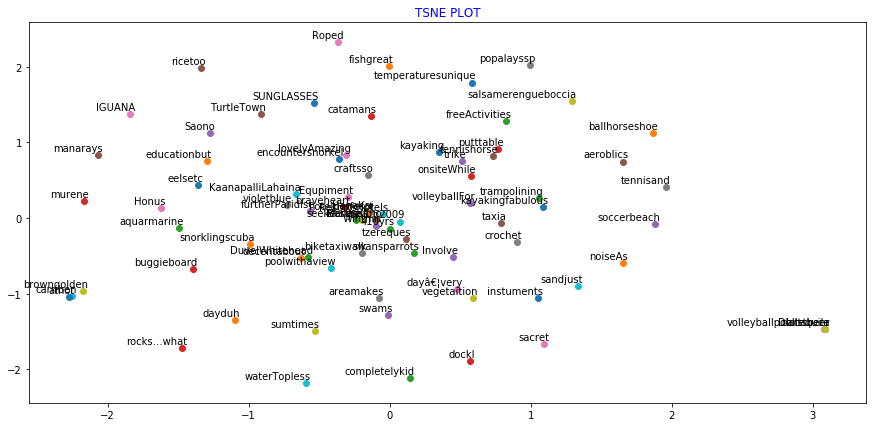

In [75]:
tsne_plot(model,concept_list_3,100)

### CLUSTER 4 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


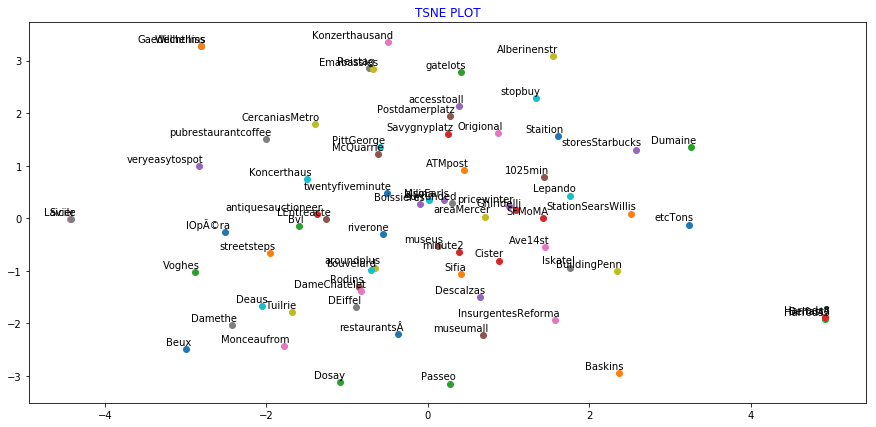

In [76]:
tsne_plot(model,concept_list_4,100)

### CLUSTER 5 

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


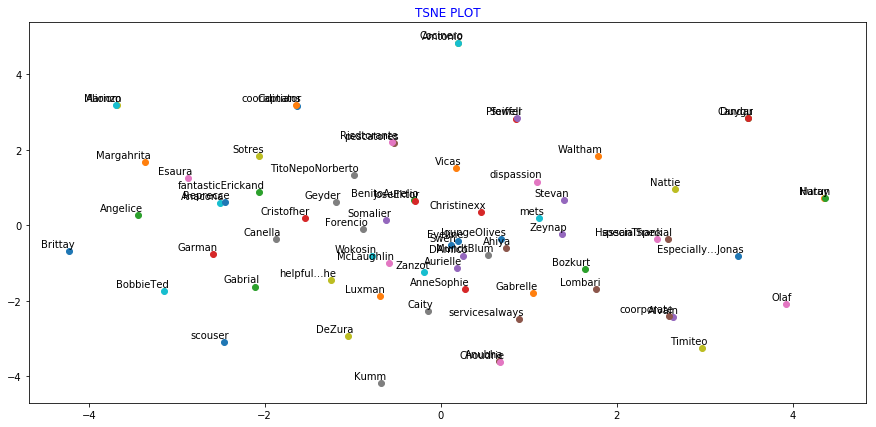

In [77]:
tsne_plot(model,concept_list_5,100)

### CLUSTER 6 

In [78]:
tsne_plot(model,concept_list_6,100)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
